In [1]:
import sys, os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import skmob as skm
# as jupyter notebook cannot find __file__, import module and submodule path via current_folder
current_folder = globals()['_dh'][0]

PROJECT_SRC_PATH = os.path.realpath(os.path.join(current_folder, '..', '..', 'xml4uf'))
sys.path.append(PROJECT_SRC_PATH)

from ufo_map.Utils.helpers import *

In [2]:
df = pd.read_csv('/Users/Felix/cluster_remote/p/projects/eubucco/test_felix/data/waypoint_stats_329219_samples.csv')
df

,ids,v_mean,v_min,v_max,a_mean,a_min,a_max,n_points,dist,time
0,0000540a40665d9353490d15cafc1f06,5.339083,0.000000,14.298873,0.001819,-0.734312,0.669963,191,15305.947149,2867.0
1,0000aea11f5f24be78907213abe7303a,6.243548,4.549513,7.937584,0.009157,0.000000,0.018314,2,2310.112894,370.0
2,0000b1a447e2a40e9ce613f1888aef9d,2.544137,2.544137,2.544137,0.000000,0.000000,0.000000,1,1350.936750,531.0
3,0000d9ba45333ba03965553393b58c88,9.482366,8.199254,10.765478,-0.016450,-0.032900,0.000000,2,1495.647628,158.0
4,0001028b7be37b79375c867927d27494,24.944504,4.839406,45.049602,0.437067,0.000000,0.874135,2,447.860663,51.0
...,...,...,...,...,...,...,...,...,...,...
329214,fffe6bbdfdc4b74d2af8767efd62b9ff,6.373869,1.807371,10.940368,0.024684,0.000000,0.049368,2,2358.331712,370.0
329215,fffec31695372d9c6159f630fae02820,10.979146,1.701720,16.156204,-0.079325,-0.603344,0.217443,19,4152.050647,530.0
329216,ffff1ddde7ae3779911cd23a5a08524a,5.643148,2.609752,10.609792,-0.000481,-0.032218,0.041299,8,8407.786635,1488.0
329217,ffff608f93ca13a0d98390640b6f3b06,23.456647,9.097327,32.765051,0.023934,0.000000,0.063132,5,22795.553618,973.0


In [3]:
# replace all inf values with nan
df.replace(np.inf,np.nan,inplace=True)
# then drop all nans
df.dropna(how='all',inplace=True)
df

,ids,v_mean,v_min,v_max,a_mean,a_min,a_max,n_points,dist,time
0,0000540a40665d9353490d15cafc1f06,5.339083,0.000000,14.298873,0.001819,-0.734312,0.669963,191,15305.947149,2867.0
1,0000aea11f5f24be78907213abe7303a,6.243548,4.549513,7.937584,0.009157,0.000000,0.018314,2,2310.112894,370.0
2,0000b1a447e2a40e9ce613f1888aef9d,2.544137,2.544137,2.544137,0.000000,0.000000,0.000000,1,1350.936750,531.0
3,0000d9ba45333ba03965553393b58c88,9.482366,8.199254,10.765478,-0.016450,-0.032900,0.000000,2,1495.647628,158.0
4,0001028b7be37b79375c867927d27494,24.944504,4.839406,45.049602,0.437067,0.000000,0.874135,2,447.860663,51.0
...,...,...,...,...,...,...,...,...,...,...
329214,fffe6bbdfdc4b74d2af8767efd62b9ff,6.373869,1.807371,10.940368,0.024684,0.000000,0.049368,2,2358.331712,370.0
329215,fffec31695372d9c6159f630fae02820,10.979146,1.701720,16.156204,-0.079325,-0.603344,0.217443,19,4152.050647,530.0
329216,ffff1ddde7ae3779911cd23a5a08524a,5.643148,2.609752,10.609792,-0.000481,-0.032218,0.041299,8,8407.786635,1488.0
329217,ffff608f93ca13a0d98390640b6f3b06,23.456647,9.097327,32.765051,0.023934,0.000000,0.063132,5,22795.553618,973.0


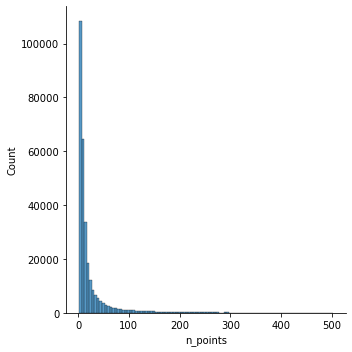

In [5]:
# plot n_points stats (we already cut the very long ones)
sns.displot(df.loc[(df.n_points>1)&(df.n_points<500)].n_points,binwidth = 5)

In [12]:
np.mean(df.n_points)

29.621060752872708

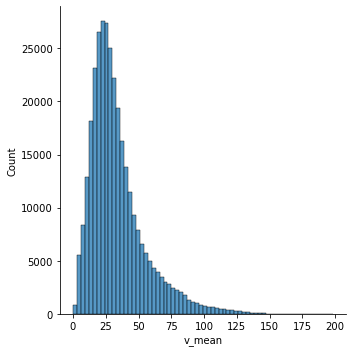

In [31]:
sns.displot(df.v_mean*3.6,binwidth = 3)

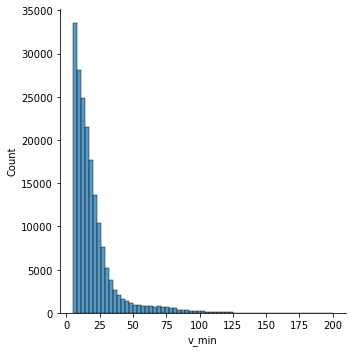

In [40]:
sns.displot(df.loc[(df.v_min>5/3.6)].v_min*3.6,binwidth = 3)

In [43]:
1-len(df.loc[(df.v_min>0/3.6)])/len(df)

0.12270555466118294

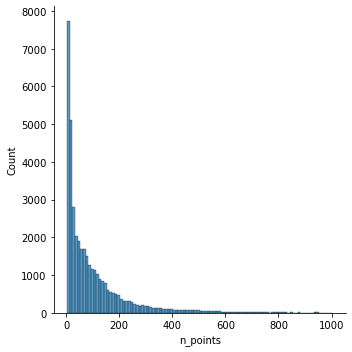

In [50]:
sns.displot(df.loc[(df.v_min==0)&(df.n_points>2)&(df.n_points<1000)].n_points,binwidth = 10)

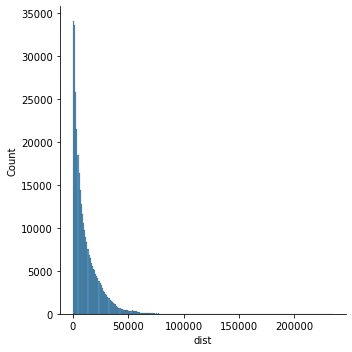

In [6]:
sns.displot(df.dist,binwidth = 1000)

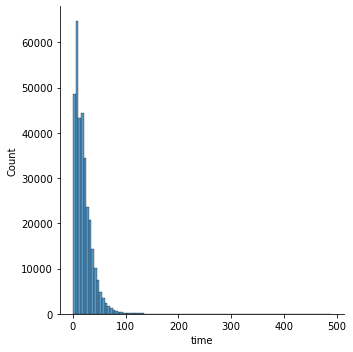

In [11]:
sns.displot(df.time/60,binwidth = 5)

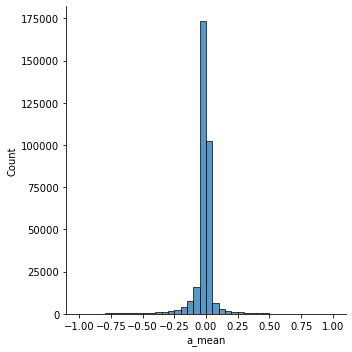

In [19]:
sns.displot(df.loc[(df.a_mean>-1)&(df.a_mean<1)].a_mean,binwidth = 0.05)

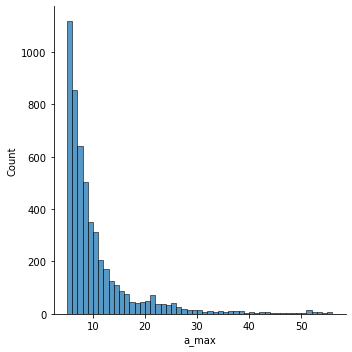

In [22]:
sns.displot(df.loc[df.a_max>5].a_max,binwidth = 1)

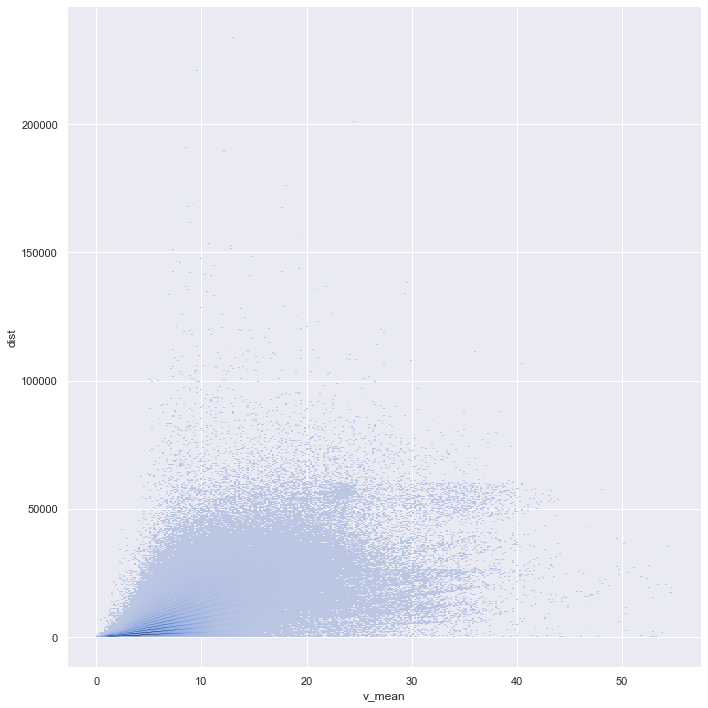

In [16]:
#fig,ax = plt.subplots(figsize=(10,10))
sns.displot(data=df, x='v_mean',y='dist',height=10,aspect=1)